# Phase 2 - Week 1 - Day 3 PM - Natural Language Processing (NLP)

> **IMPORTANT NOTES**
>
> Before you run the code below, please make sure that you already change the runtime to GPU.

# A. Understanding CountVectorizer

In [1]:
# Let's Define Simple Corpus

corpus = [
    'Saya sedang belajar data science',
    'Data yang saya proses adalah data teks',
    'NLP adalah cabang besar didalam data science'
]

`CountVectorizer()` is a module in Scikit Learn that use Bag of Words. Two methods that usually used are :
* `.fit()` : used to collect vocabularies.
* `.transform()` : used to convert token into numeric value.

*See this [link](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) for more details.*

In [2]:
# Collect the Vocabularies using CountVectorizer()

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
count_vect.fit(corpus)

CountVectorizer()

In [3]:
# See Vocabularies

count_vect.get_feature_names_out()

array(['adalah', 'belajar', 'besar', 'cabang', 'data', 'didalam', 'nlp',
       'proses', 'saya', 'science', 'sedang', 'teks', 'yang'],
      dtype=object)

In [4]:
# Transform from Corpus into Numerical Vector

corpus_count_vect = count_vect.transform(corpus)
corpus_count_vect

<3x13 sparse matrix of type '<class 'numpy.int64'>'
	with 18 stored elements in Compressed Sparse Row format>

Notes :

* As you can see, variable `corpus_vect` is stored as **sparse matrix**.
* The sparse matrix is a matrix that contains non-zero values.
* From the above output, we see that there are **`3 x 13` equal to 39 values but only 18 of them are not zeroes (only 46.15 %) with 13 vocabularies**.
* This is just from simple corpus that contains 3 documents.
* Imagine if you have a corpus with large documents. Consequently, you will  have massive non-zero values.

In [5]:
# Let's See Contents of Sparse Matrix

print(corpus_count_vect)

  (0, 1)	1
  (0, 4)	1
  (0, 8)	1
  (0, 9)	1
  (0, 10)	1
  (1, 0)	1
  (1, 4)	2
  (1, 7)	1
  (1, 8)	1
  (1, 11)	1
  (1, 12)	1
  (2, 0)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 9)	1


As previously mentioned, a sparse matrix is a matrix that only save non-zero values. On the other hand, a dense matrix is a matrix that contains all values (both zero values and non-zero values). See the comparison below as illustration.

<img src='https://static.javatpoint.com/ds/images/types-of-sparse-matrices.png'>

In [6]:
# See `corpus_vect` as Dense Matrix

corpus_count_vect.toarray()

array([[0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0],
       [1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0]])

In [7]:
# Display corpus

corpus

['Saya sedang belajar data science',
 'Data yang saya proses adalah data teks',
 'NLP adalah cabang besar didalam data science']

In [8]:
# See `corpus_vect` with Their Token's Name

import pandas as pd
pd.DataFrame(corpus_count_vect.toarray(), columns = count_vect.get_feature_names_out())

,adalah,belajar,besar,cabang,data,didalam,nlp,proses,saya,science,sedang,teks,yang
0,0,1,0,0,1,0,0,0,1,1,1,0,0
1,1,0,0,0,2,0,0,1,1,0,0,1,1
2,1,0,1,1,1,1,1,0,0,1,0,0,0


# B. Case 1 : YouTube Spam Comment

For this case study, we will try to **detect a YouTube comment whether a spam comment or not**.

*You can find the dataset in this [link](https://raw.githubusercontent.com/FTDS-learning-materials/phase-1/master/w4/P1W4D3PM%20-%20Natural%20Language%20Processing%20(NLP)%20-%20YouTube%20Spam%20Comment.csv).*

## B.1 - Import Libraries & Data Loading

In [9]:
# Import Libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, precision_score, recall_score, accuracy_score, f1_score

In [10]:
# Data Loading

data = pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/phase-2/master/w1/P2W1D3PM%20-%20Natural%20Language%20Processing%20(NLP)%20-%20YouTube%20Spam%20Comment.csv')
data.head(5)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxx﻿,1
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,jason graham,2015-05-29T02:26:10.652000,I always end up coming back to this song<br />﻿,0
2,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",1
3,z12wjzc4eprnvja4304cgbbizuved35wxcs,Dakota Taylor,2015-05-29T02:13:07.810000,Cool﻿,0
4,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,Jihad Naser,NaN,Hello I&#39;am from Palastine﻿,1


In [11]:
# Check Distribution of Dataset

data.CLASS.value_counts()

1    245
0    203
Name: CLASS, dtype: int64

For this task, we only need column `CONTENT` as corpus and column `CLASS` as target.

In [12]:
# Splitting Dataset

X_train, X_test, y_train, y_test = train_test_split(data.CONTENT,
                                                    data.CLASS,
                                                    test_size=0.3,
                                                    random_state=10)

print('Train Size : ', len(X_train))
print('Test Size  : ', len(X_test))

Train Size :  313
Test Size  :  135


## B.2 - Model Building

We will create two models with `CountVectorizer()` :
* 1 model without stopwords
* 1 model with stopwords

After that, we will compare the performance from both models.

### B.2.1 - Without Stopwords

In [13]:
# CountVectorizer without Stopwords

vect = CountVectorizer()

vect.fit(X_train)
X_train_vect = vect.transform(X_train)
X_test_vect = vect.transform(X_test)
X_train_vect

<313x1297 sparse matrix of type '<class 'numpy.int64'>'
	with 5083 stored elements in Compressed Sparse Row format>

From this corpus, there are **405,961 values (from 313 * 1297)** but only **5,083 tokens that are non-zero values (1.25 %) with 1,297 vocabularies**.

In [14]:
# Train the Model

model_knn_vect = KNeighborsClassifier(n_neighbors=5)
model_knn_vect.fit(X_train_vect, y_train)

KNeighborsClassifier()

In [15]:
# Save Classification Report into a Dictionary

all_reports = {}

def save_report(model, X_train, X_test, y_train, y_test, name, all_reports):
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  score_reports = {
      'train - precision' : precision_score(y_train, y_pred_train),
      'train - recall' : recall_score(y_train, y_pred_train),
      'train - accuracy' : accuracy_score(y_train, y_pred_train),
      'train - f1_score' : f1_score(y_train, y_pred_train),
      'test - precision' : precision_score(y_test, y_pred_test),
      'test - recall' : recall_score(y_test, y_pred_test),
      'test - accuracy_score' : accuracy_score(y_test, y_pred_test),
      'test - f1_score' : f1_score(y_test, y_pred_test)
  }
  all_reports[name] = score_reports

  return all_reports

In [16]:
# Model Evaluation

all_reports = save_report(model_knn_vect, X_train_vect, X_test_vect, y_train, y_test, 'CountVectorizer', all_reports)
pd.DataFrame(all_reports)

,CountVectorizer
test - accuracy_score,0.807407
test - f1_score,0.790323
test - precision,1.000000
test - recall,0.653333
train - accuracy,0.878594
train - f1_score,0.874172
train - precision,1.000000
train - recall,0.776471


### B.2.2 - With Stopwords

In [17]:
# Download Stopwords

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
# Define Stopwords
## Load Stopwords from NLTK
from nltk.corpus import stopwords
stop_words_en = stopwords.words("english")

print('Stopwords from NLTK')
print(len(stop_words_en), stop_words_en)
print('')

## Create A New Stopwords
new_stop_words = ['aye', 'mine', 'have']

## Merge Stopwords
stop_words_en = stop_words_en + new_stop_words
stop_words_en = list(set(stop_words_en))
print('Out Final Stopwords')
print(len(stop_words_en), stop_words_en)

Stopwords from NLTK
179 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own',

In [19]:
# CountVectorizer with Stopwords

vect_sw = CountVectorizer(stop_words = stop_words_en)

vect_sw.fit(X_train)
X_train_vect_sw = vect_sw.transform(X_train)
X_test_vect_sw = vect_sw.transform(X_test)
X_train_vect_sw

<313x1190 sparse matrix of type '<class 'numpy.int64'>'
	with 3306 stored elements in Compressed Sparse Row format>

Differences between without stopwords and with stopwords in terms of vocabularies.
* Without Stopwords (only CountVectorizer)
  - Total values : 313*1297 = 405,961
  - Total non-zero values : 5,083
  - Percentage : 1.25 %
  - Total vocabularies : 1,297
* With Stopwords
  - Total values : 313*1190 = 372,470
  - Total non-zero values : 3,306
  - Percentage : 0.89 %
  - Total vocabularies : 1,190

As shown above, with stopwords :
* We reduce our non-zeros values from 5,083 to 3,306 (**34.96 %**) and
* We also reduce the vocabularies from 1,297 to 1,190 (**8.25 %**)

In [20]:
# Train the Model

model_knn_vect_sw = KNeighborsClassifier(n_neighbors=5)
model_knn_vect_sw.fit(X_train_vect_sw, y_train)

KNeighborsClassifier()

In [21]:
# Model Evaluation

all_reports = save_report(model_knn_vect_sw, X_train_vect_sw, X_test_vect_sw, y_train, y_test, 'CountVectorizer + Stopwords', all_reports)
pd.DataFrame(all_reports)

,CountVectorizer,CountVectorizer + Stopwords
train - precision,1.000000,1.000000
train - recall,0.776471,0.764706
train - accuracy,0.878594,0.872204
train - f1_score,0.874172,0.866667
test - precision,1.000000,1.000000
test - recall,0.653333,0.653333
test - accuracy_score,0.807407,0.807407
test - f1_score,0.790323,0.790323


The performance of the two has the same results. However, it can be said that the model using stopwords is better because it uses a much smaller amount of vocab but can still maintain its performance.

## B.3 - Model Inference

In [22]:
# Predict New Texts

## Define New Data
new_texts = ['i love this artist',
             'please subscribe my channel at bla bla bla']

## Predict without Stopwords-Model
new_texts_vect = vect.transform(new_texts)
print('Without Stopwords : ', model_knn_vect.predict(new_texts_vect))

## Predict with Stopwords-Model
new_texts_vect_sw = vect_sw.transform(new_texts)
print('With Stopwords    : ', model_knn_vect_sw.predict(new_texts_vect_sw))

Without Stopwords :  [0 1]
With Stopwords    :  [0 1]


# C. Case 2 : Twitter Sentiment Analysis

## C.1 - Import Libraries & Data Loading

In [23]:
# Import Libraries

import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as tf_hub

from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords')
nltk.download('punkt')
!pip install pysastrawi

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 5.1 MB/s eta 0:00:00


In [24]:
# Data Loading

data = pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/phase-2/master/w1/P2W1D3PM%20-%20Natural%20Language%20Processing%20(NLP)%20-%20Twitter%20Sentiment%20Analysis.csv',header=None).rename({0:'sentimen',1:'text'},axis=1)
data

,sentimen,text
0,|positive|,|@PrincessSuperC Hai Cici tersayang! Cuma mau ...
1,|positive|,|@Msdebramaye Saya mendengar tentang kontes it...
2,|positive|,|UNC!!! Pemenang NCAA!! Franklin St.: I ADA DI...
3,|positive|,|@DivHumas_Polri: Hoax dan Ujaran Kebencian da...
4,|positive|,|@DivHumas_Polri: Polri : Reuni 212 Berjalan K...
...,...,...
3704,|positive|,|yay|
3705,|positive|,|yeah|
3706,|positive|,|yihaa|
3707,|negative|,|dungu|


## C.2 - Text Preprocessing

In [25]:
# Define Stopwords
from nltk.corpus import stopwords
stpwds_id = list(set(stopwords.words('indonesian')))
stpwds_id.append('oh') # Cara lain dari "stpwds_id = stpwds_id + ['oh']"

# Define Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
stemmer = StemmerFactory().create_stemmer()

In [26]:
# Create A Function for Text Preprocessing

def text_preprocessing(text):
  # Case folding
  text = text.lower()

  # Mention removal
  text = re.sub("@[A-Za-z0-9_]+", " ", text)

  # Hashtags removal
  text = re.sub("#[A-Za-z0-9_]+", " ", text)

  # Newline removal (\n)
  text = re.sub(r"\\n", " ",text)

  # Whitespace removal
  text = text.strip()

  # URL removal
  text = re.sub(r"http\S+", " ", text)
  text = re.sub(r"www.\S+", " ", text)

  # Non-letter removal (such as emoticon, symbol (like μ, $, 兀), etc
  text = re.sub("[^A-Za-z\s']", " ", text)

  # Tokenization
  tokens = word_tokenize(text)

  # Stopwords removal
  tokens = [word for word in tokens if word not in stpwds_id]

  # Stemming
  tokens = [stemmer.stem(word) for word in tokens]

  # Combining Tokens
  text = ' '.join(tokens)

  return text

In [27]:
# Applying Text Preprocessing to the Dataset

data['text_processed'] = data['text'].apply(lambda x: text_preprocessing(x))
data

,sentimen,text,text_processed
0,|positive|,|@PrincessSuperC Hai Cici tersayang! Cuma mau ...,hai cici sayang memberitaukan cinta kunjung ce...
1,|positive|,|@Msdebramaye Saya mendengar tentang kontes it...,dengar kontes selamat teman
2,|positive|,|UNC!!! Pemenang NCAA!! Franklin St.: I ADA DI...,unc menang ncaa franklin st i sana seru baik
3,|positive|,|@DivHumas_Polri: Hoax dan Ujaran Kebencian da...,hoax ujar benci ancam satu lapor janban sebar ...
4,|positive|,|@DivHumas_Polri: Polri : Reuni 212 Berjalan K...,polri reuni jalan kondusif
...,...,...,...
3704,|positive|,|yay|,yay
3705,|positive|,|yeah|,yeah
3706,|positive|,|yihaa|,yihaa
3707,|negative|,|dungu|,dungu


## C.3 - Target Conversion

In [28]:
# Display Target

data.sentimen.unique()

array(['|positive|', '|neutral|', '|negative|', '|netral|'], dtype=object)

In [29]:
# Change Target into Number

data['label'] = data['sentimen'].replace({'|negative|' : 0, '|neutral|' : 1, '|netral|' : 1, '|positive|' : 2})
data

,sentimen,text,text_processed,label
0,|positive|,|@PrincessSuperC Hai Cici tersayang! Cuma mau ...,hai cici sayang memberitaukan cinta kunjung ce...,2
1,|positive|,|@Msdebramaye Saya mendengar tentang kontes it...,dengar kontes selamat teman,2
2,|positive|,|UNC!!! Pemenang NCAA!! Franklin St.: I ADA DI...,unc menang ncaa franklin st i sana seru baik,2
3,|positive|,|@DivHumas_Polri: Hoax dan Ujaran Kebencian da...,hoax ujar benci ancam satu lapor janban sebar ...,2
4,|positive|,|@DivHumas_Polri: Polri : Reuni 212 Berjalan K...,polri reuni jalan kondusif,2
...,...,...,...,...
3704,|positive|,|yay|,yay,2
3705,|positive|,|yeah|,yeah,2
3706,|positive|,|yihaa|,yihaa,2
3707,|negative|,|dungu|,dungu,0


In [30]:
# Target Distribution

data['label'].value_counts()

0    2570
2     982
1     157
Name: label, dtype: int64

In [31]:
# Data Splitting

X_train_val, X_test, y_train_val, y_test = train_test_split(data.text_processed,
                                                    data.label,
                                                    test_size=0.15,
                                                    random_state=20,
                                                    stratify=data.label)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size=0.10,
                                                  random_state=20,
                                                  stratify=y_train_val)

print('Train Size : ', X_train.shape)
print('Val Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (2836,)
Val Size   :  (316,)
Test Size  :  (557,)


In [32]:
# Change Target to One Hot Encoding

from tensorflow.keras.utils import to_categorical

y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)
y_train_ohe

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

## C.4 - Model Building

### C.4.1 - Text Vectorization

In [33]:
# Get Vocabularies

Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_test_vec = Vectorize.transform(X_test)

X_train_vec

<2836x2352 sparse matrix of type '<class 'numpy.int64'>'
	with 5730 stored elements in Compressed Sparse Row format>

In [34]:
# Finding the Number of Vocabs and Max Token Length in One Document

total_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print('Total Vocab : ', total_vocab)
print('Maximum Sentence Length : ', max_sen_len, 'tokens')

Total Vocab :  2352
Maximum Sentence Length :  34 tokens


In [35]:
# Text Vectorization

from tensorflow.keras.layers import TextVectorization

text_vectorization = TextVectorization(max_tokens=total_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,)) # Only use in Sequential API

text_vectorization.adapt(X_train)

In [36]:
# Example Result

## Document example
print('Document example')
print(data.text_processed[0])
print('')

## Result of Text Vectorization
print('Result of Text Vectorization')
print(text_vectorization([data.text_processed[0]]))
print('Vector size : ', text_vectorization([data.text_processed[0]]).shape)

Document example
hai cici sayang memberitaukan cinta kunjung cepat fantasi berkendari mei

Result of Text Vectorization
tf.Tensor(
[[  1   1  81   1 344   1  54   1   1   1   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]], shape=(1, 34), dtype=int64)
Vector size :  (1, 34)


In [37]:
# View the Top 20 Tokens (Sorted by the Highest Frequency of Appearance)

text_vectorization.get_vocabulary()[:20]

['',
 '[UNK]',
 'x',
 'xe',
 'xa',
 'rt',
 'b',
 'yg',
 'f',
 'polri',
 'salah',
 'hina',
 'orang',
 'xf',
 'hukum',
 'hoax',
 'd',
 'polisi',
 'penuh',
 'sakit']

### C.4.2 - Word Embedding

In [38]:
# Embedding

from tensorflow.keras.layers import Embedding
embedding = Embedding(input_dim=total_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len)

In [39]:
# Example Result

## Document example
print('Document example')
print(data.text_processed[0])
print('')

## Result of Text Vectorization
print('Result of  Text Vectorization')
print(text_vectorization([data.text_processed[0]]))
print('Vector size : ', text_vectorization([data.text_processed[0]]).shape)
print('')

## Result of  Embedding
print('Result of  Embedding')
print(embedding(text_vectorization([data.text_processed[0]])))
print('Vector size : ', embedding(text_vectorization([data.text_processed[0]])).shape)

Document example
hai cici sayang memberitaukan cinta kunjung cepat fantasi berkendari mei

Result of  Text Vectorization
tf.Tensor(
[[  1   1  81   1 344   1  54   1   1   1   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]], shape=(1, 34), dtype=int64)
Vector size :  (1, 34)

Result of  Embedding
tf.Tensor(
[[[-0.02276369 -0.00489011 -0.01642827 ... -0.00813825 -0.0120615
    0.00279718]
  [-0.02276369 -0.00489011 -0.01642827 ... -0.00813825 -0.0120615
    0.00279718]
  [ 0.02227573  0.04936295  0.04887727 ...  0.0188737   0.03153001
   -0.00907928]
  ...
  [ 0.04354925  0.04612832  0.03494103 ... -0.01930313  0.04099547
    0.00454011]
  [ 0.04354925  0.04612832  0.03494103 ... -0.01930313  0.04099547
    0.00454011]
  [ 0.04354925  0.04612832  0.03494103 ... -0.01930313  0.04099547
    0.00454011]]], shape=(1, 34, 128), dtype=float32)
Vector size :  (1, 34, 128)


### C.4.3 - LSTM

In [40]:
# Model Training using LSTM
%%time

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, Dropout, Reshape

## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Define the architecture
model_lstm_1 = Sequential()
model_lstm_1.add(text_vectorization)
model_lstm_1.add(embedding)
model_lstm_1.add(Bidirectional(LSTM(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_1.add(Dropout(0.1))
model_lstm_1.add(Bidirectional(LSTM(16, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_1.add(Dropout(0.1))
model_lstm_1.add(Dense(3, activation='softmax'))

model_lstm_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

model_lstm_1_hist = model_lstm_1.fit(X_train, y_train_ohe, epochs=50, validation_data=(X_val, y_val_ohe))

Epoch 1/50
89/89 [==============================] - 33s 90ms/step - loss: 0.7408 - accuracy: 0.6911 - val_loss: 0.6903 - val_accuracy: 0.6899
Epoch 2/50
89/89 [==============================] - 3s 33ms/step - loss: 0.6306 - accuracy: 0.7214 - val_loss: 0.6142 - val_accuracy: 0.7247
Epoch 3/50
89/89 [==============================] - 2s 18ms/step - loss: 0.4131 - accuracy: 0.8389 - val_loss: 0.6563 - val_accuracy: 0.7405
Epoch 4/50
89/89 [==============================] - 1s 15ms/step - loss: 0.2953 - accuracy: 0.8949 - val_loss: 0.6980 - val_accuracy: 0.7468
Epoch 5/50
89/89 [==============================] - 1s 15ms/step - loss: 0.2522 - accuracy: 0.9069 - val_loss: 0.6720 - val_accuracy: 0.7532
Epoch 6/50
89/89 [==============================] - 1s 14ms/step - loss: 0.2239 - accuracy: 0.9136 - val_loss: 0.7665 - val_accuracy: 0.7342
Epoch 7/50
89/89 [==============================] - 1s 14ms/step - loss: 0.2153 - accuracy: 0.9150 - val_loss: 0.8108 - val_accuracy: 0.7342
Epoch 8/50
8

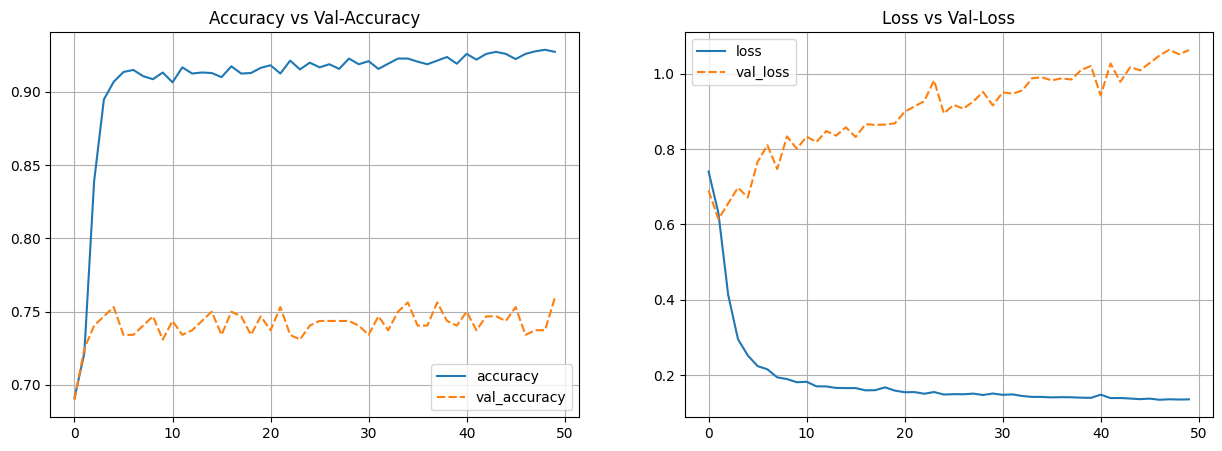

In [41]:
# Plot Training Results

model_lstm_1_hist_df = pd.DataFrame(model_lstm_1_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_1_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_1_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

It can be seen that our model is overfit. Train accuracy is really high, more than 90 %, meanwhile validation accuracy is around 60 %.

### C.4.4 - LSTM with Transfer Learning

Let's improve our model using transfer learning. We will use embedding layer that was trained on Google news 3B corpus.

For more details please visit :
* [Embedding layer source](https://tfhub.dev/google/tf2-preview/nnlm-id-dim128-with-normalization/1)
* [List of Embedding Layers in Indonesian language](https://tfhub.dev/s?module-type=text-embedding&q=indonesian)

In [42]:
# Download the Embedding Layer

url = 'https://tfhub.dev/google/tf2-preview/nnlm-id-dim128-with-normalization/1'

hub_layer = tf_hub.KerasLayer(url, output_shape=[128], input_shape=[], dtype=tf.string)

In [43]:
# Model Training using LSTM with Transfer Learning
%%time

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, Dropout, Reshape

## Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

## Define the architecture
model_lstm_2 = Sequential()
model_lstm_2.add(hub_layer)
model_lstm_2.add(Reshape((128, 1)))
model_lstm_2.add(Bidirectional(LSTM(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_2.add(Dropout(0.1))
model_lstm_2.add(Bidirectional(LSTM(16, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_2.add(Dropout(0.1))
model_lstm_2.add(Dense(3, activation='softmax'))

model_lstm_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

model_lstm_2_hist = model_lstm_2.fit(X_train, y_train_ohe, epochs=50, validation_data=(X_val, y_val_ohe))

Epoch 1/50
89/89 [==============================] - 11s 37ms/step - loss: 0.8064 - accuracy: 0.6904 - val_loss: 0.7459 - val_accuracy: 0.6930
Epoch 2/50
89/89 [==============================] - 2s 21ms/step - loss: 0.7458 - accuracy: 0.6929 - val_loss: 0.7361 - val_accuracy: 0.6930
Epoch 3/50
89/89 [==============================] - 2s 27ms/step - loss: 0.7432 - accuracy: 0.6929 - val_loss: 0.7353 - val_accuracy: 0.6930
Epoch 4/50
89/89 [==============================] - 2s 23ms/step - loss: 0.7420 - accuracy: 0.6929 - val_loss: 0.7335 - val_accuracy: 0.6930
Epoch 5/50
89/89 [==============================] - 2s 21ms/step - loss: 0.7394 - accuracy: 0.6929 - val_loss: 0.7298 - val_accuracy: 0.6930
Epoch 6/50
89/89 [==============================] - 2s 21ms/step - loss: 0.7392 - accuracy: 0.6929 - val_loss: 0.7614 - val_accuracy: 0.6930
Epoch 7/50
89/89 [==============================] - 2s 21ms/step - loss: 0.7424 - accuracy: 0.6929 - val_loss: 0.7273 - val_accuracy: 0.6930
Epoch 8/50
8

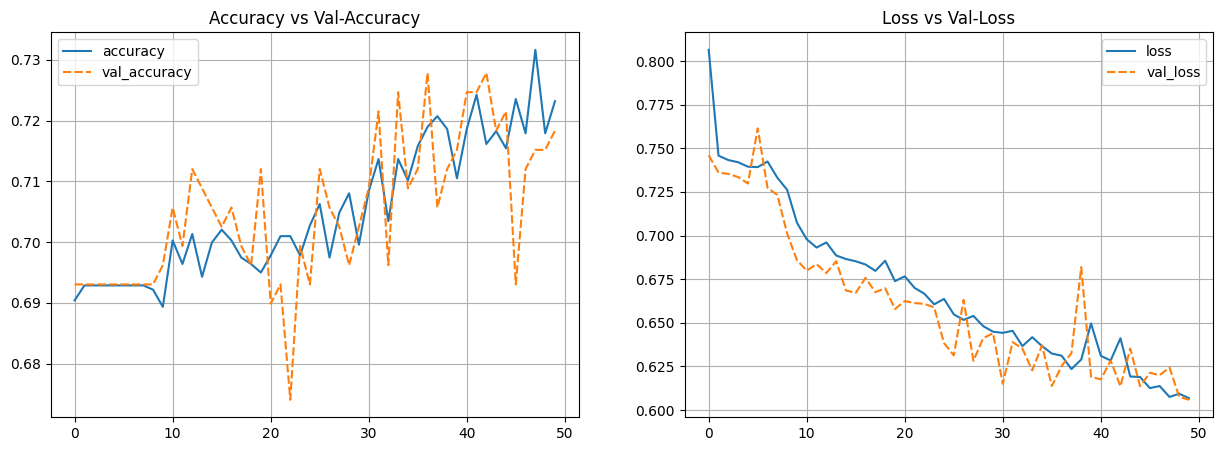

In [44]:
# Plot Training Results

model_lstm_2_hist_df = pd.DataFrame(model_lstm_2_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_2_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_2_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

After we added transfer learning into our model, the model is less overfit and tends to be good-fit. But, it so hard to increase the accuracy. Here are some possibilities that cause it :

1. Incomplete text preprocessing.
   Dataset from social media often in informal text. Therefore, we must handle it first such as :
   * Implement Word Formalization : `u` become `you`, `gw` become `saya`.
   * Remove repeated characters in a word : `pagiii` become `pagi`, `aduuuhhh` become `aduh`.
   * Handle repeated words : `tinggi2` become `tinggi-tinggi`, `sebenar2nya` become `sebenar-benarnya`.
   * Remove single char.
   * etc.

2. Imbalanced dataset
   
   Our dataset contains of target with distribution :
   * `0` : 2570
   * `1` : 157
   * `2` : 982